<a href="https://colab.research.google.com/github/jskim16/MLproj/blob/main/%EC%95%8C%ED%8C%8C%EB%B2%B3%EC%9D%B8%EC%8B%9D_AI%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from google.colab import drive

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/A_Z Handwritten Data.csv').astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

x = dataset.drop('label', axis = 1)
y = dataset['label']

train_images, test_images, train_labels, test_labels = train_test_split(x, y)

In [5]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(train_images)

train_images = minMaxScaler.transform(train_images)
test_images = minMaxScaler.transform(test_images)

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')

train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)

In [63]:
train_images.shape

(279337, 28, 28, 1)

In [6]:
from keras import models
from keras import layers

In [7]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(48, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=256)

Epoch 1/100
8730/8730 [==============================] - 35s 4ms/step - loss: 0.0142 - accuracy: 0.9982 - val_loss: 0.2142 - val_accuracy: 0.9925
Epoch 2/100
8730/8730 [==============================] - 36s 4ms/step - loss: 0.0200 - accuracy: 0.9973 - val_loss: 0.1953 - val_accuracy: 0.9923
Epoch 3/100
8730/8730 [==============================] - 35s 4ms/step - loss: 0.0213 - accuracy: 0.9971 - val_loss: 0.2110 - val_accuracy: 0.9918
Epoch 4/100
8730/8730 [==============================] - 34s 4ms/step - loss: 0.0229 - accuracy: 0.9970 - val_loss: 0.2335 - val_accuracy: 0.9911
Epoch 5/100
8730/8730 [==============================] - 35s 4ms/step - loss: 0.0245 - accuracy: 0.9970 - val_loss: 0.2081 - val_accuracy: 0.9928
Epoch 6/100
8730/8730 [==============================] - 34s 4ms/step - loss: 0.0233 - accuracy: 0.9971 - val_loss: 0.2035 - val_accuracy: 0.9926
Epoch 7/100
8730/8730 [==============================] - 36s 4ms/step - loss: 0.0216 - accuracy: 0.9973 - val_loss: 0.2392 -

In [45]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

2910/2910 [==============================] - 7s 2ms/step - loss: 0.9575 - accuracy: 0.9943


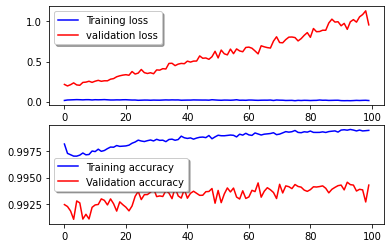

In [46]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [64]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/X.jpg')
img = img.resize((28, 28))
img_data = np.array(img)

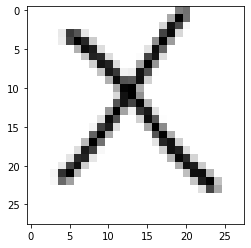

In [65]:
plt.imshow(img_data)

In [66]:
trans_img = img_data.transpose(2, 0, 1)

In [67]:
trans_test_img = 1 - trans_img[0,:] / 255.0

In [68]:
trans_test_img = trans_test_img.reshape(1, 28, 28, 1)

In [69]:
output = model.predict(trans_test_img)

In [70]:
al_map = {0:'A',1:'B',2:'C',3:'D',
          4:'E',5:'F',6:'G',7:'H',
          8:'I',9:'J',10:'K',11:'L',
          12:'M',13:'N',14:'O',15:'P',
          16:'Q',17:'R',18:'S',19:'T',
          20:'U',21:'V',22:'W',23:'X',
          24:'Y',25:'Z'}

result = al_map[np.argmax(output)]

In [71]:
print("결과는 : ", result)

결과는 :  X
